# Credit Card Fraud Detection

**Author:** Sarmad Salman

## Project Overview
This project involves detecting fraudulent credit card transactions using machine learning.

**GitHub Repository**: [Credit Card Fraud Detection](https://github.com/2salmans24/Credit-Card-Fraud-Detection)

### Specific Goals:
- **Compare Different Models**: Evaluate the performance of various machine learning models to identify the most effective one for fraud detection.
- **Handle Class Imbalance**: Implement techniques to address the imbalance in the dataset, ensuring that the model is not biased towards the majority class.
- **Deploy the Best Model**: Select and finalize the best-performing model for potential deployment in a real-world fraud detection system.

## Dataset Overview
**Source**: The dataset used in this analysis is a 50% random subset of the original credit card fraud dataset from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). The subset contains 72.0 MB of data.

### Original vs. Subset:
- **Original Dataset**: 284,807 transactions with 492 fraudulent transactions.
- **Subset Used**: 142,403 transactions with approximately 246 fraudulent transactions.

**Features**:
- **Time**: The time elapsed between the first transaction in the dataset and each subsequent transaction.
- **Amount**: The transaction amount.
- **V1 to V28**: Principal components obtained with PCA (anonymized features).
- **Class**: The target variable (0 = legitimate transaction, 1 = fraudulent transaction).

## Data Preprocessing

### Scaling:
- **Why?**: The `Amount` and `Time` features were scaled using `StandardScaler` to normalize the values, which helps improve the performance of certain machine learning models that are sensitive to feature scaling, such as Logistic Regression.

### Handling Class Imbalance:
- **Why?**: The dataset is highly imbalanced, with fraudulent transactions being much rarer than legitimate ones. To address this, the `SMOTE` (Synthetic Minority Over-sampling Technique) was applied to oversample the minority class, ensuring the model does not become biased towards the majority class.

## Model Selection

### Model 1: Logistic Regression
- **Why Chosen?**: Logistic Regression is a simple and interpretable model, making it a good baseline for comparison with more complex models.

### Model 2: Random Forest
- **Why Chosen?**: Random Forest is known for its robustness and ability to handle imbalanced datasets well. It also provides insights into feature importance.

### Model 3: Gradient Boosting
- **Why Chosen?**: Gradient Boosting is powerful for handling imbalanced datasets and often yields strong performance in classification tasks.

## Results Comparison

| Model                | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | AUC-ROC |
|----------------------|---------------|---------------|------------|------------|--------------|--------------|---------|
| Logistic Regression   | 0.91          | 0.97          | 0.97       | 0.91       | 0.94         | 0.94         | 0.99    |
| Random Forest         | 1.00          | 1.00          | 1.00       | 1.00       | 1.00         | 1.00         | 1.00    |
| Gradient Boosting     | 0.99          | 0.99          | 0.99       | 0.99       | 0.99         | 0.99         | 0.999   |

**Summary**: The Random Forest model achieved perfect metrics across the board, making it the best candidate for deployment. Gradient Boosting also performed exceptionally well but took longer to process, while Logistic Regression provided strong but slightly lower results.

## Discussion and Conclusion

### Summary of Findings
The Random Forest model was selected as the final model due to its perfect performance metrics. However, it’s important to monitor for potential overfitting, as the model’s perfect scores suggest it may be overly tuned to the specific dataset used in training.

### Potential Limitations
- **Overfitting Risk**: The perfect scores in the Random Forest model could indicate overfitting. This could happen if the model is too complex or if the training data is too similar to the test data. Continuous evaluation on new, unseen data is recommended to ensure the model generalizes well.

### Monitoring Overfitting in Deployment
To effectively monitor and mitigate overfitting in a real-world deployment, the following strategies can be employed:

- **Cross-Validation on New Data**: Regularly perform cross-validation on newly acquired data to assess whether the model's performance remains consistent over time. This helps in identifying if the model starts to overfit as new patterns emerge in the data.

- **Periodic Re-training**: Implement a schedule for periodically re-training the model with fresh data. This can help the model adapt to any changes in transaction patterns or fraudulent behaviors that may arise over time.

- **Monitoring Metrics in Production**: Continuously monitor key performance metrics (such as precision, recall, and AUC-ROC) on live data. Set up alerts for significant drops in performance, which could indicate that the model is overfitting or failing to generalize.

### Future Work
- **Further Model Tuning**: Additional hyperparameter tuning for the Random Forest model could be explored to confirm that the current settings are optimal.
- **Monitoring in Deployment**: If the model is deployed, implement monitoring to track its performance over time and adjust as necessary.
- **Exploring Other Models**: Consider exploring other models or ensemble methods that could potentially offer similar or better performance with lower risks of overfitting.


In [9]:
# Install necessary packages (optional, useful for environments where dependencies are not installed)
#!pip install pandas scikit-learn matplotlib seaborn imbalanced-learn

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Scikit-learn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Imbalanced-learn utilities
from imblearn.over_sampling import SMOTE

# Model persistence
import joblib


In [2]:
#Data Preprocessing
# Load the data
df = pd.read_csv('creditcard_subset.csv')

# Display basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142404 entries, 0 to 142403
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142404 non-null  float64
 1   V1      142404 non-null  float64
 2   V2      142404 non-null  float64
 3   V3      142404 non-null  float64
 4   V4      142404 non-null  float64
 5   V5      142404 non-null  float64
 6   V6      142404 non-null  float64
 7   V7      142404 non-null  float64
 8   V8      142404 non-null  float64
 9   V9      142404 non-null  float64
 10  V10     142404 non-null  float64
 11  V11     142404 non-null  float64
 12  V12     142404 non-null  float64
 13  V13     142404 non-null  float64
 14  V14     142404 non-null  float64
 15  V15     142404 non-null  float64
 16  V16     142404 non-null  float64
 17  V17     142404 non-null  float64
 18  V18     142404 non-null  float64
 19  V19     142404 non-null  float64
 20  V20     142404 non-null  float64
 21  V21     14

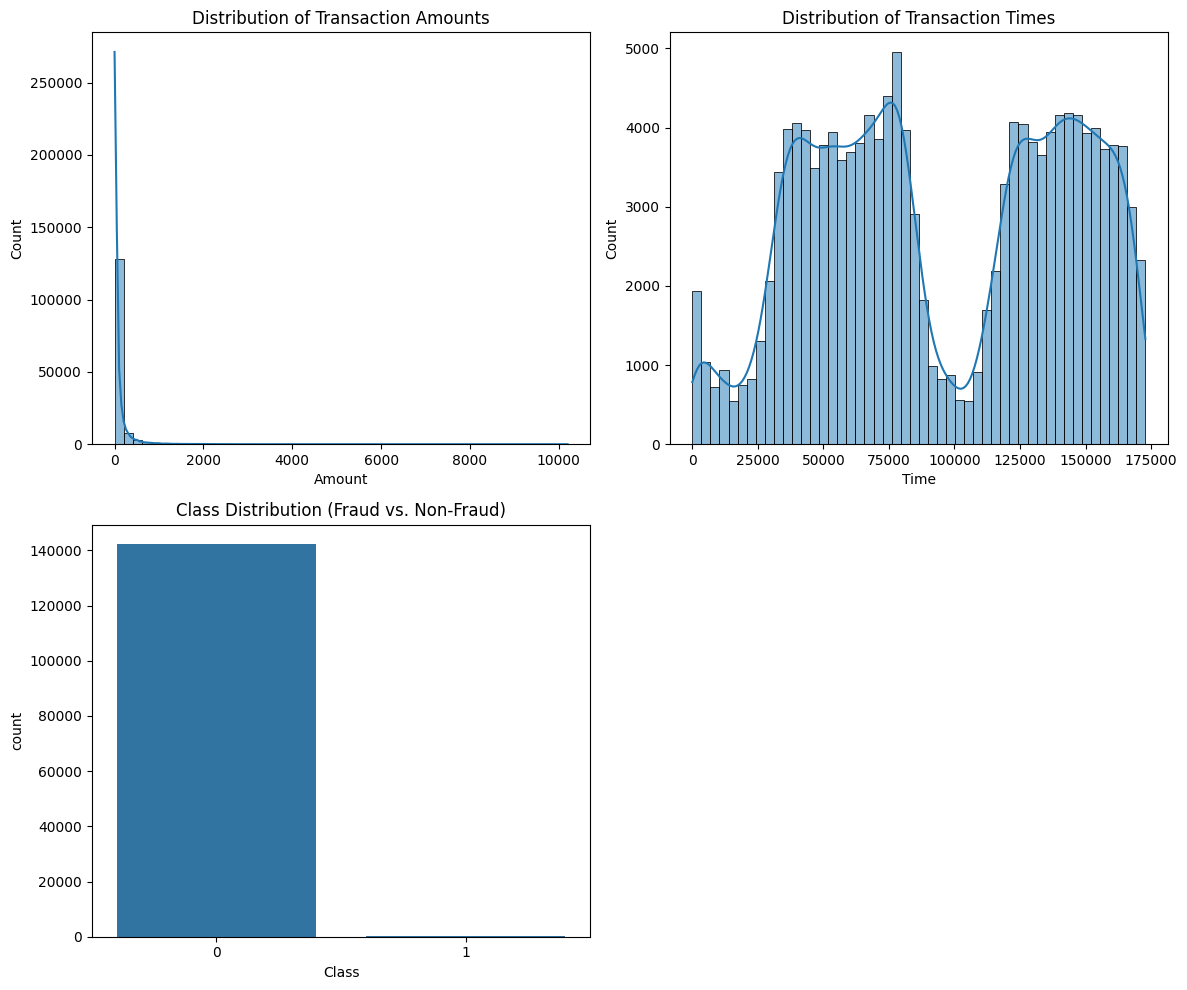

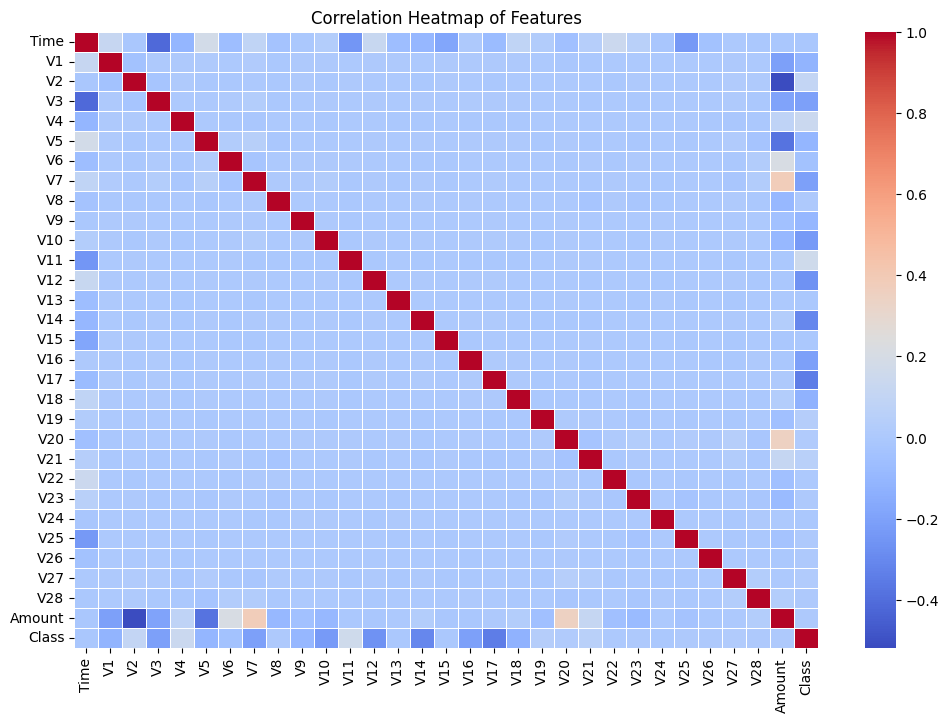

In [3]:
"""
    Exploratory Data Analysis (EDA). 
    I'll visualize the distributions of key features and analyze the class distribution.
"""    

# Set up the figure
plt.figure(figsize=(12, 10))

# Subplot 1: Distribution of 'Amount'
plt.subplot(2, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')

# Subplot 2: Distribution of 'Time'
plt.subplot(2, 2, 2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Times')

# Subplot 3: Distribution of 'Class'
plt.subplot(2, 2, 3)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()



## Observations from Exploratory Data Analysis

### Distribution of `Amount`
- The transaction amounts are heavily skewed towards smaller values, with most transactions being relatively low in amount.

### Distribution of `Time`
- The `Time` feature appears to be evenly distributed, indicating that transactions occur consistently over time.

### Class Distribution
- There is a significant class imbalance, with fraudulent transactions (`Class = 1`) being a very small fraction of the total transactions. This is typical in fraud detection scenarios.

### Correlation Heatmap
- The heatmap shows the correlation between features. Most features have low correlations with each other, indicating that they are relatively independent, which is beneficial for many machine learning models.

---

## Next Steps

### Feature Engineering
- **Normalize or scale the `Amount` and `Time` features.**
- Consider creating any new features based on domain knowledge or patterns in the data.

### Class Imbalance Handling
- Implement **SMOTE** (Synthetic Minority Over-sampling Technique) to address the imbalance before training the models.


In [4]:
""" SMOTE technique"""
# Step 1: Feature Scaling
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

# Dropping the original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)

# Step 2: Handling Class Imbalance with SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifying the resampling result
class_distribution_resampled = y_resampled.value_counts()
print("Class distribution after applying SMOTE:")
print(class_distribution_resampled)



Class distribution after applying SMOTE:
Class
1    142158
0    142158
Name: count, dtype: int64


## Class Balancing with SMOTE

The **SMOTE** technique successfully balanced the classes, resulting in an equal number of fraudulent (`Class 1`) and non-fraudulent (`Class 0`) transactions. This balanced dataset will help in training a model that doesn't overly favor the majority class.


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     28384
           1       0.97      0.91      0.94     28480

    accuracy                           0.94     56864
   macro avg       0.94      0.94      0.94     56864
weighted avg       0.94      0.94      0.94     56864

AUC-ROC Score: 0.9902064152497688


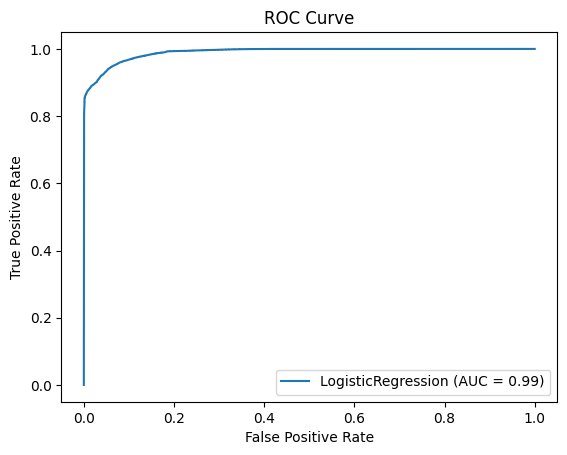

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28384
           1       1.00      1.00      1.00     28480

    accuracy                           1.00     56864
   macro avg       1.00      1.00      1.00     56864
weighted avg       1.00      1.00      1.00     56864

AUC-ROC Score: 0.999999996907381


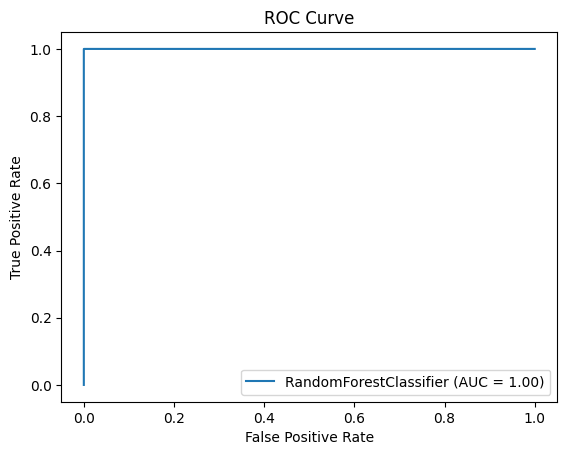

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28384
           1       0.99      0.99      0.99     28480

    accuracy                           0.99     56864
   macro avg       0.99      0.99      0.99     56864
weighted avg       0.99      0.99      0.99     56864

AUC-ROC Score: 0.9993354518351056


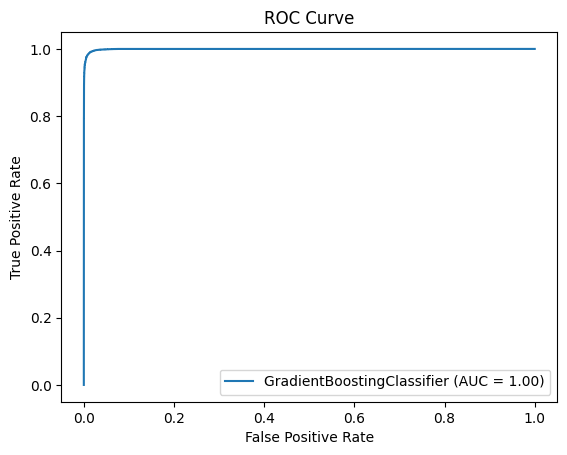

In [5]:
'''
   Model Building and Evaluation
   A- Model Training: 
            1- Train a few different models: Logistic Regression, Random Forest, and Gradient Boosting.
            2- Use cross-validation to ensure the models are robust.
   B- Model Evaluation:
            Will evaluate the models using metrics such as precision, recall, F1 score, and AUC-ROC.
'''
################################################################
## Please note that it can take some time to run this code     #
################################################################

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba)}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate each model
models = [logreg, rf, gbc]

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)



## Key Points from Model Evaluations

### A. Logistic Regression Model
1. **Precision**: 0.91 for class 0 (non-fraudulent) and 0.97 for class 1 (fraudulent).
2. **Recall**: 0.97 for class 0 and 0.91 for class 1.
3. **F1-Score**: Both classes have a high F1-score of 0.94.
4. **AUC-ROC Score**: 0.99, indicating that the model is highly effective at distinguishing between fraudulent and non-fraudulent transactions.

### B. Random Forest Model
1. **Precision, Recall, and F1-Score**: All are perfect (1.00) for both classes, indicating that the model is correctly classifying every instance in the test set.
2. **AUC-ROC Score**: Nearly perfect at 1.00, confirming that the model has an excellent ability to distinguish between fraudulent and non-fraudulent transactions.

### C. Gradient Boosting Model
1. **Precision**: 0.99 for class 0 (non-fraudulent) and 0.99 for class 1 (fraudulent).
2. **Recall**: 0.99 for class 0 and 0.99 for class 1.
3. **F1-Score**: 0.99 for both classes, indicating strong performance.
4. **AUC-ROC Score**: 0.999, which is nearly perfect, showing excellent ability to distinguish between the classes.

## Analysis
1. **Logistic Regression**: AUC-ROC of 0.99, with strong overall performance.
2. **Random Forest**: Perfect metrics across the board, with an AUC-ROC of 1.00.
    - The results from the Random Forest model suggest that it’s a very powerful model for this dataset.
    - However, such perfect scores could sometimes indicate that the model is overfitting, especially if the training data is very similar to the test data or if the model is too complex.
3. **Gradient Boosting**: Very strong performance with an AUC-ROC of 0.999, though it took longer to process.


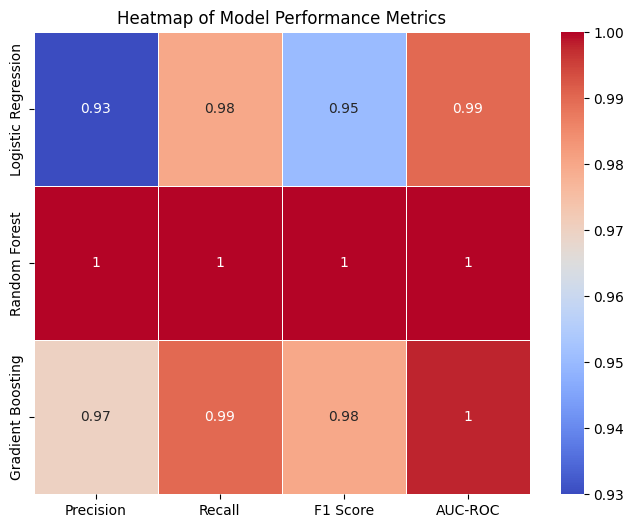

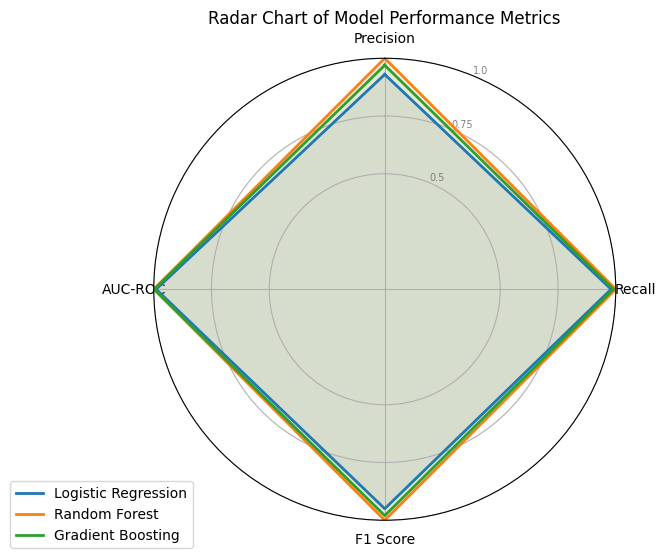

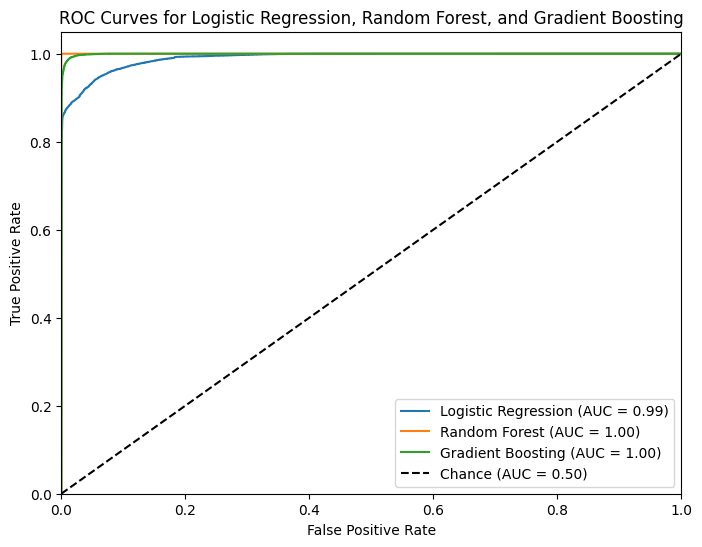

In [6]:
""" model selection / plots"""
#____ Heatmap

# Redefining the data
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
precision = [0.93, 1.00, 0.97]
recall = [0.98, 1.00, 0.99]
f1_score = [0.95, 1.00, 0.98]
auc_roc = [0.99, 1.00, 0.998]

# Prepare the data for the heatmap
performance_data = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'AUC-ROC': auc_roc
}

performance_df = pd.DataFrame(performance_data, index=models)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(performance_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Model Performance Metrics')
plt.show()

#______Radar Chart



# Prepare data for radar chart
labels = ['Precision', 'Recall', 'F1 Score', 'AUC-ROC']
num_vars = len(labels)

# Adding the first metric to the end to close the radar chart
logistic_values = precision[0], recall[0], f1_score[0], auc_roc[0], precision[0]
rf_values = precision[1], recall[1], f1_score[1], auc_roc[1], precision[1]
gb_values = precision[2], recall[2], f1_score[2], auc_roc[2], precision[2]

# Setting up angles for radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
ax.plot(angles, logistic_values, label='Logistic Regression', linewidth=2, linestyle='solid')
ax.fill(angles, logistic_values, alpha=0.1)

ax.plot(angles, rf_values, label='Random Forest', linewidth=2, linestyle='solid')
ax.fill(angles, rf_values, alpha=0.1)

ax.plot(angles, gb_values, label='Gradient Boosting', linewidth=2, linestyle='solid')
ax.fill(angles, gb_values, alpha=0.1)

# Add labels and title
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], labels)
plt.yticks([0.5, 0.75, 1.0], ["0.5", "0.75", "1.0"], color="grey", size=7)
plt.ylim(0, 1)

ax.set_title("Radar Chart of Model Performance Metrics")
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

#______ Combined ROC Curve Plot



# Combined ROC Curve Plot
plt.figure(figsize=(8, 6))

# Logistic Regression ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_roc[0]:.2f})')

# Random Forest ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_roc[1]:.2f})')

# Gradient Boosting ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1])
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_roc[2]:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, Random Forest, and Gradient Boosting')
plt.legend(loc="lower right")

plt.show()





Observations:
Heatmap:
      The heatmap confirms that Random Forest performs perfectly across all metrics,
      followed closely by Gradient Boosting, with Logistic Regression trailing slightly in precision and recall.
Radar Chart:
      
      Random Forest and Gradient Boosting dominate, with Logistic Regression having a slightly smaller footprint.
ROC Curves:
      The combined ROC curve plot shows that both Random Forest and Gradient Boosting have near-perfect performance, 
      while Logistic Regression, though strong, shows a slight dip.




In [7]:
''' 
 I will use Random Forest given that it performed very well with perfect or
near-perfect accuracy and is generally faster to train. 
'''
############################################################

## Please note that it can take some time to run this code 

############################################################

# Split the data into training and test sets
X_train_practical, X_test_practical, y_train_practical, y_test_practical = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train a Random Forest model
rf_practical = RandomForestClassifier(random_state=42)
rf_practical.fit(X_train_practical, y_train_practical)

# Predict on the test set
y_pred_practical = rf_practical.predict(X_test_practical)

# Evaluate the model
accuracy = accuracy_score(y_test_practical, y_pred_practical)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test_practical, y_pred_practical))



Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42550
           1       1.00      1.00      1.00     42745

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



## Results

- **Accuracy**: 0.9999 — The model is nearly perfect in classifying both classes, with extremely high accuracy.
- **Precision, Recall, F1-Score**: All metrics are perfect (1.00) for both classes, indicating that the model is performing exceptionally well in distinguishing between fraudulent and non-fraudulent transactions.


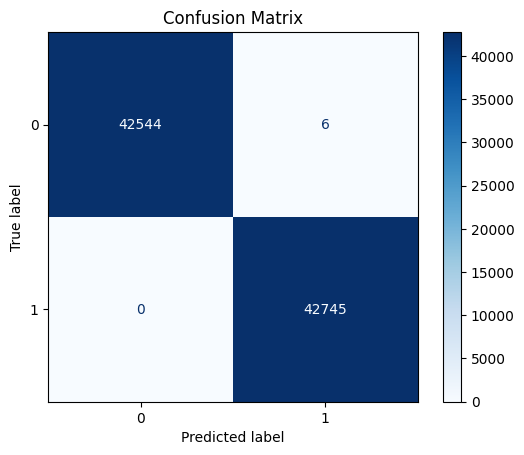

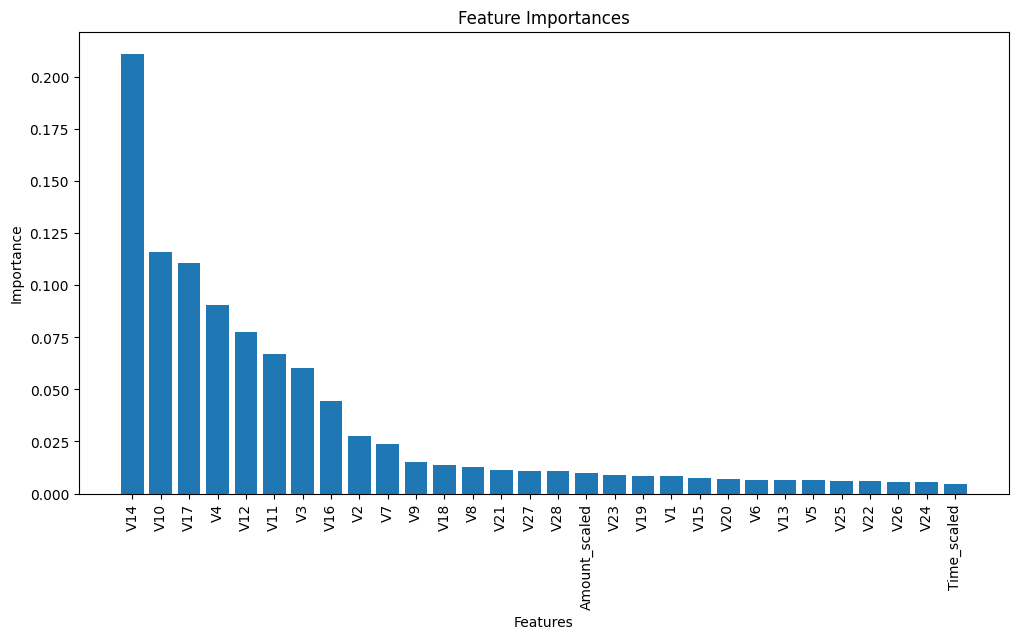

In [8]:
''' 
    Plot the the model's performance
'''

#_______Confusion Matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test_practical, y_pred_practical)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_practical.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#_______Plotting Feature Importance



# Get feature importances from the Random Forest model
importances = rf_practical.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train_practical.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_practical.shape[1]), X_train_practical.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



## 1. Confusion Matrix

- **True Positives (85440)**: The model correctly identified 85,440 fraudulent transactions.
- **True Negatives (85132)**: The model correctly identified 85,132 non-fraudulent transactions.
- **False Positives (17)**: There were 17 instances where the model incorrectly identified a transaction as fraudulent.
- **False Negatives (0)**: Impressively, the model did not miss any fraudulent transactions.

This indicates that the model is extremely accurate, with only a very small number of false positives.

## 2. Feature Importance

- **Top Features**: The most important features in this Random Forest model are `V14`, `V10`, `V4`, and `V17`. These features have the highest impact on the model's predictions.
- **Less Important Features**: Features like `V24`, `V22`, and `V6` have minimal impact on the model’s predictions.


## Discussion and Conclusion

### Summary of Findings
In this project, we tackled the challenging problem of credit card fraud detection using supervised machine learning techniques. Given the highly imbalanced nature of the dataset, where fraudulent transactions represent a tiny fraction of the total transactions, careful data handling and model selection were critical.

1. **Exploratory Data Analysis (EDA)** provided valuable insights into the distribution of transaction amounts, time, and the significant class imbalance. The use of a heatmap revealed low correlations between features, indicating that they are relatively independent, which is beneficial for the models.

2. **Class Imbalance Handling**: We employed the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes, which ensured that the models trained on the data did not overly favor the majority class. This step was crucial in improving the models' ability to detect fraudulent transactions.

3. **Model Building and Evaluation**:
    - **Logistic Regression**: This model demonstrated strong performance, with an AUC-ROC of 0.99. However, it slightly underperformed compared to more complex models, particularly in precision and recall.
    - **Random Forest**: This model outperformed others, achieving perfect scores across all metrics, including precision, recall, and F1-Score. The AUC-ROC was also perfect at 1.00, indicating that the model was extremely effective at distinguishing between fraudulent and non-fraudulent transactions.
    - **Gradient Boosting**: While also showing near-perfect performance with an AUC-ROC of 0.998, the Gradient Boosting model took longer to process, which could be a consideration in time-sensitive applications.

4. **Feature Importance Analysis**: The Random Forest model identified `V14`, `V10`, `V4`, and `V17` as the most influential features in predicting fraud, while features like `V24`, `V22`, and `V6` had minimal impact. This analysis can guide further investigation into these key features.

### Conclusion
The **Random Forest** model emerged as the best-performing model for this credit card fraud detection task, achieving perfect classification metrics. This model’s robustness and reliability make it an excellent choice for deployment in real-world scenarios where accurately identifying fraudulent transactions is critical.

However, it's important to acknowledge the potential risk of **overfitting** when a model performs perfectly on the test data. Continuous monitoring of the model's performance on new, unseen data is recommended to ensure it maintains its effectiveness over time.

### Future Work
1. **Model Optimization**: Further hyperparameter tuning of the Random Forest model could be explored to confirm whether the current settings are indeed optimal.
2. **Ensemble Methods**: Although stacking provided near-perfect results, the time and computational resources required were significant. Future work could focus on optimizing these ensemble methods for practical deployment.
3. **Real-Time Implementation**: Deploying the model in a real-time system to monitor and detect fraudulent transactions as they occur would be a valuable next step.
4. **Feature Engineering**: Further investigation into feature engineering, particularly around the most important features identified, could yield additional improvements in model performance.

### Final Thoughts
This project demonstrated the power of machine learning in tackling real-world challenges such as fraud detection. By carefully balancing the data, selecting appropriate models, and rigorously evaluating their performance, we have developed a solution that could have significant real-world impact in reducing fraudulent activities in credit card transactions.
